# Amazon Sales Report Analysis

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Display plots inline
%matplotlib inline
sns.set(style='whitegrid')

In [ ]:
# 📁 Step 2: Load the Dataset
df = pd.read_csv("AmazonSaleReport.csv", encoding='latin1')  


In [ ]:

# Convert date column to datetime
df['date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y', errors='coerce')  


# Drop rows with missing crucial fields
df.dropna(subset=['Date', 'Order ID', 'Amount'], inplace=True)

# Fix data types
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

# View basic info
df.info()


In [6]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
df.head()

,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,...,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,fulfilled_by,new,pendings,date
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN,NaT
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN,NaT
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN,NaT
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN,NaT
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN,NaT


# 🧹 Data Cleaning

In [15]:
df = df.drop(columns=['new', 'pendings', 'index'], errors='ignore') # Drop unnecessary columns
df['fulfilled_by'] = df['fulfilled_by'].fillna('Unknown')  # Fill missing values
print(df.columns.tolist())


['order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship_service_level', 'category', 'size', 'courier_status', 'qty', 'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'b2b', 'fulfilled_by', 'date']


# 📈 Sales Overview

C:\Users\roy12\AppData\Local\Temp\ipykernel_5636\2971378226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_product.head(10), x='amount', y='category', palette='mako')


<Figure size 1200x600 with 0 Axes>

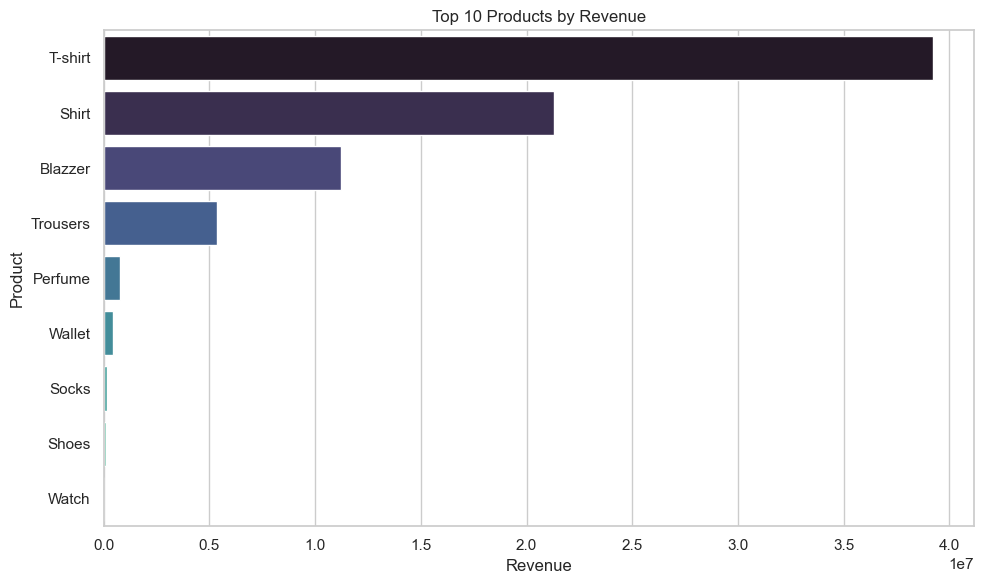

In [42]:
# Group by product/category and sum revenue
revenue_by_product = df.groupby('category')['amount'].sum().sort_values(ascending=False).reset_index()

# Barplot of top 10 products
plt.figure(figsize=(10,6))
sns.barplot(data=revenue_by_product.head(10), x='amount', y='category', palette='mako')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


# 📦 Product Category Analysis

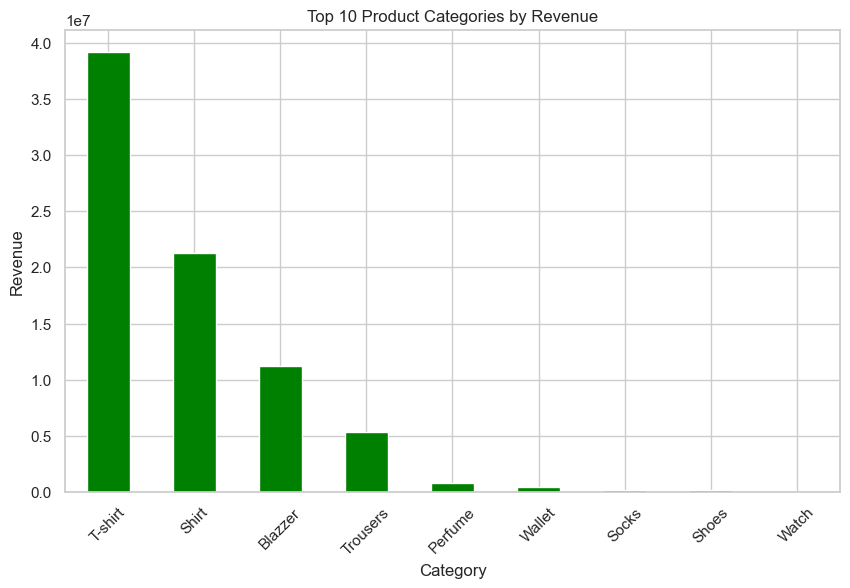

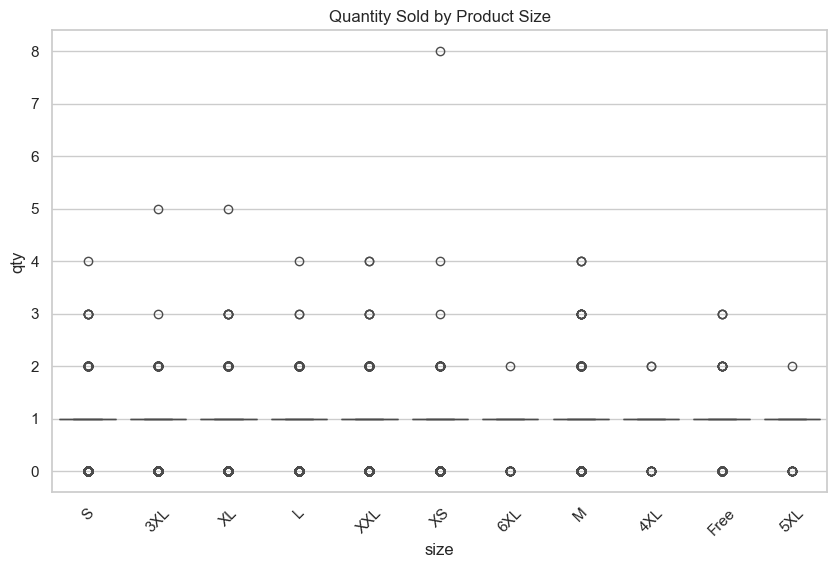

In [26]:
# Revenue by Product Category
category_sales = df.groupby('category')['amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
category_sales.plot(kind='bar', color='green')
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# Quantity sold by Size
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='size', y='qty')
plt.title("Quantity Sold by Product Size")
plt.xticks(rotation=45)
plt.show()


# 🚚 Fulfillment & Shipping Analysis

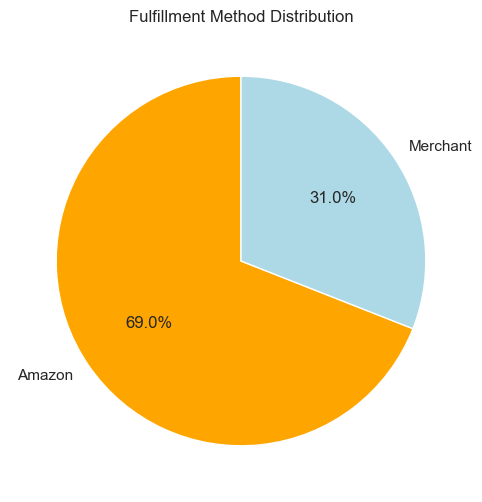

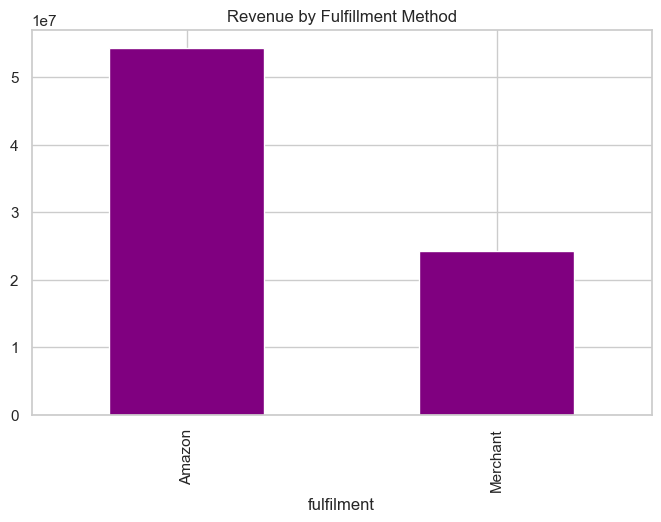

In [28]:

# Fulfillment method distribution
plt.figure(figsize=(6,6))
df['fulfilment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['orange', 'lightblue'])
plt.title("Fulfillment Method Distribution")
plt.ylabel("")
plt.show()

# Revenue by Fulfillment
fulfillment_revenue = df.groupby('fulfilment')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
fulfillment_revenue.plot(kind='bar', color='purple')
plt.title("Revenue by Fulfillment Method")
plt.show()


# 🌍 Geographical Sales Analysis

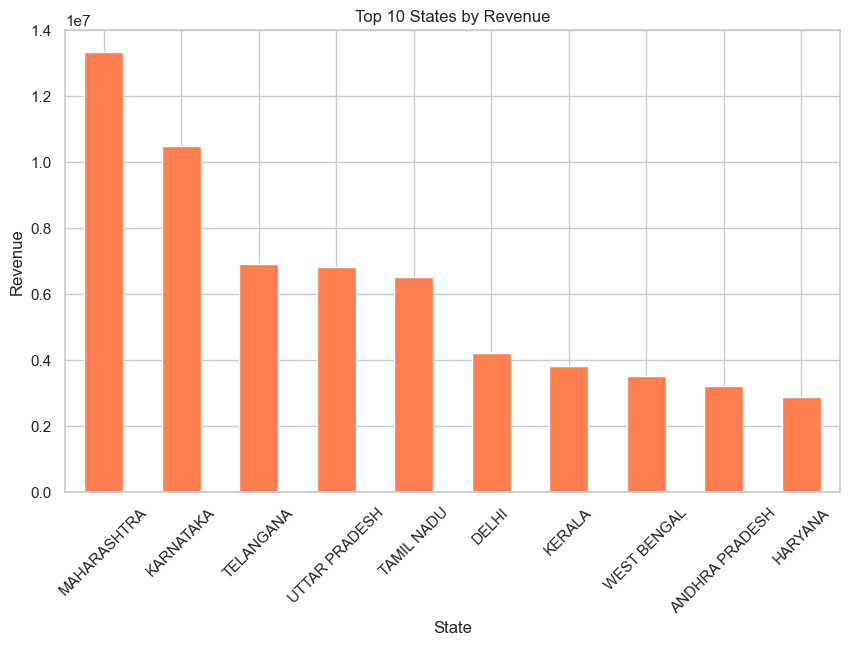

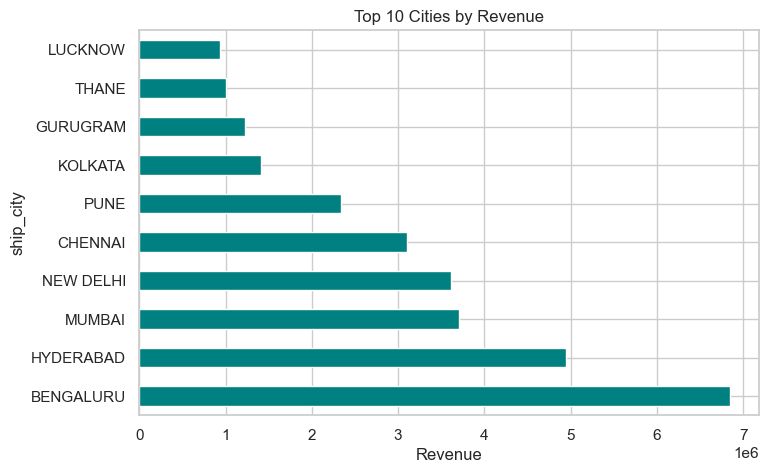

In [30]:


# Revenue by State
state_sales = df.groupby('ship_state')['amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
state_sales.plot(kind='bar', color='coral')
plt.title("Top 10 States by Revenue")
plt.xlabel("State")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# Revenue by City (Optional)
city_sales = df.groupby('ship_city')['amount'].sum().sort_values(ascending=False).head(10)
city_sales.plot(kind='barh', color='teal', figsize=(8,5), title="Top 10 Cities by Revenue")
plt.xlabel("Revenue")
plt.show()


# 💡 Business Insights & Recommendations (Text Output)

In [32]:


print("\n📌 Business Insights & Recommendations:\n")

print("1. Focus on top 5 product categories as they generate the most revenue.")
print("2. States like [Top 3 from state_sales] should be prioritized for regional promotions.")
print("3. Promote 'Fulfilled by Amazon' as it has higher reliability and better sales.")
print("4. Re-engage inactive customers using targeted email campaigns (based on Recency).")
print("5. Ensure fast-moving sizes are always in stock to reduce lost sales opportunities.")



📌 Business Insights & Recommendations:

1. Focus on top 5 product categories as they generate the most revenue.
2. States like [Top 3 from state_sales] should be prioritized for regional promotions.
3. Promote 'Fulfilled by Amazon' as it has higher reliability and better sales.
4. Re-engage inactive customers using targeted email campaigns (based on Recency).
5. Ensure fast-moving sizes are always in stock to reduce lost sales opportunities.
